## THIS PRACTICE FILE TRIES TO COMPARE THE DIFFERENT TREE MODELS ALONG WITH ADABOOST ON BOTH BALANCED AND IMBALANCED DATASETS

### IMBALANCED DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
columns=['Department','EducationField','JobRole','BusinessTravel','MaritalStatus']
for col in columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=False).astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})
df['Over18']=df['Over18'].map({'Y':1,'N':0})
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18'])

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Attrition']),df['Attrition'],test_size=0.2,random_state=42,stratify=df['Attrition'])

In [ ]:
tree_model=DecisionTreeClassifier(splitter='best',max_depth=7,min_samples_leaf=20,criterion='gini')

In [ ]:
boost_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50,learning_rate=1)

max_depth=1 imply stumps.

If we increase it the base model becomes stronger and there is a chance of overfiting

In [ ]:
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.8197278911564626

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.42      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294



In [ ]:
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.8299319727891157

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.44      0.23      0.31        47

    accuracy                           0.83       294
   macro avg       0.65      0.59      0.60       294
weighted avg       0.80      0.83      0.81       294



In [ ]:
rf_base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base_estimator.fit(X_train, y_train)
y_pred_adaboost_rf = rf_base_estimator.predict(X_test)

print("AdaBoosted Random Forest Accuracy: ", accuracy_score(y_test, y_pred_adaboost_rf))
print("\nAdaBoosted Random Forest Classification Report: \n", classification_report(y_test, y_pred_adaboost_rf))

AdaBoosted Random Forest Accuracy:  0.8367346938775511

AdaBoosted Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



In [ ]:
X_2class_pca = PCA(n_components=2).fit_transform(X_train)
X_2class_pca=StandardScaler().fit_transform(X_2class_pca)

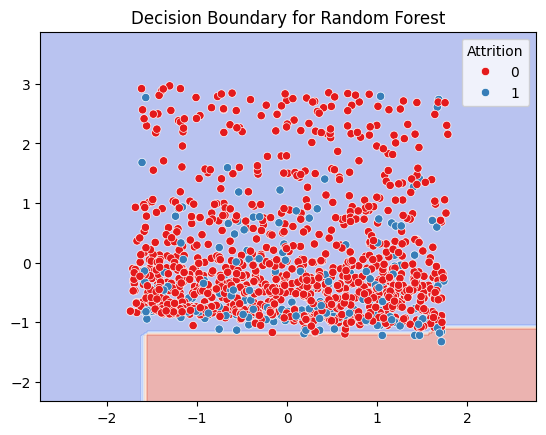

In [ ]:
model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,random_state=42)
model.fit(X_2class_pca, y_train)
#This features tells how many points are to be there in the decision area...small values of h can lead to high ram usage
h = 0.1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_train, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary for Random Forest")
plt.show()

### BALANCED DATASET

In [ ]:
bc=load_breast_cancer()
X=bc.data
y=bc.target
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(X,columns=bc.feature_names)
X.head()
# y=pd.Series(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
tree_model=DecisionTreeClassifier(splitter='best',max_depth=7,min_samples_leaf=20,criterion='gini')

In [ ]:
boost_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50,learning_rate=1)

In [ ]:
rf_base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.9035087719298246

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        42
           1       0.98      0.86      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114



In [ ]:
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.956140350877193

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
rf_base_estimator.fit(X_train,y_train)
y_pred=rf_base_estimator.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.956140350877193

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
rf_boost_model = AdaBoostClassifier(rf_base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
rf_boost_model.fit(X_train, y_train)
y_pred=rf_boost_model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.956140350877193

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
X_2class_pca = PCA(n_components=2).fit_transform(X_train)
X_2class_pca=StandardScaler().fit_transform(X_2class_pca)

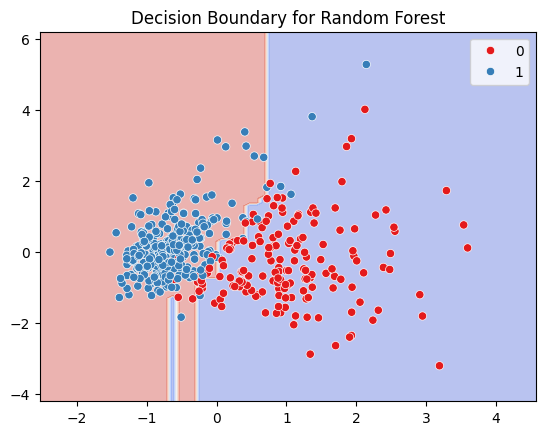

In [ ]:
model=boost_model
model.fit(X_2class_pca, y_train)
#This features tells how many points are to be there in the decision area...small values of h can lead to high ram usage
h = 0.1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_train, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary for Random Forest")
plt.show()

#### CONCLUSION
> ADABOOST AVOIDS OVERIFITNG

> ON IMBALANCED DATASET DECISION TREES PERFORM BETTER

> ON BALANCED DATASET ADABOOST AND RANDOM FOREST HAVE SIMILAR ACCURACY

> DECISION BOUNDARIES FOR TREE BASED MODELS ARE STRIPED